In [1]:
import pandas as pd 
import numpy as np
from numpy import matlib as mb
from tiingo import TiingoClient
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint

In [2]:
#Install the client 
config = {}

config['session'] = True
config['api_key'] = ""
client = TiingoClient(config)

In [3]:
#Load Data in as dataframes 
eww_etf = client.get_dataframe('EWW',startDate='2017-11-10', endDate='2024-01-11', frequency='daily')
flmx_etf = client.get_dataframe('FLMX',startDate='2017-11-10', endDate='2024-01-11', frequency='daily')

In [4]:
eww_etf = eww_etf.add_prefix('eww_')
flmx_etf = flmx_etf.add_prefix('flmx_')

In [5]:
eww_etf.head()

,eww_close,eww_high,eww_low,eww_open,eww_volume,eww_adjClose,eww_adjHigh,eww_adjLow,eww_adjOpen,eww_adjVolume,eww_divCash,eww_splitFactor
date,,,,,,,,,,,,
2017-11-10 00:00:00+00:00,49.75,50.790,49.735,50.62,4266917,42.506423,43.395000,42.493607,43.249752,4266917,0.0,1.0
2017-11-13 00:00:00+00:00,49.74,49.845,49.275,49.53,4034233,42.497879,42.587591,42.100583,42.318455,4034233,0.0,1.0
2017-11-14 00:00:00+00:00,49.40,49.865,49.260,49.75,3364010,42.207383,42.604679,42.087767,42.506423,3364010,0.0,1.0
2017-11-15 00:00:00+00:00,49.16,49.400,48.010,49.23,4174441,42.002327,42.207383,41.019766,42.062135,4174441,0.0,1.0
2017-11-16 00:00:00+00:00,49.78,49.960,49.290,49.45,2923000,42.532055,42.685847,42.113399,42.250103,2923000,0.0,1.0


In [6]:
flmx_etf.head()

,flmx_close,flmx_high,flmx_low,flmx_open,flmx_volume,flmx_adjClose,flmx_adjHigh,flmx_adjLow,flmx_adjOpen,flmx_adjVolume,flmx_divCash,flmx_splitFactor
date,,,,,,,,,,,,
2017-11-10 00:00:00+00:00,25.055,25.07,25.055,25.07,200,20.939708,20.952244,20.939708,20.952244,200,0.0,1.0
2017-11-13 00:00:00+00:00,24.760,24.76,24.753,24.76,2000,20.693162,20.693162,20.687312,20.693162,2000,0.0,1.0
2017-11-14 00:00:00+00:00,24.630,24.73,24.610,24.67,54163,20.584515,20.668090,20.567800,20.617945,54163,0.0,1.0
2017-11-15 00:00:00+00:00,24.450,24.54,24.420,24.54,800,20.434080,20.509297,20.409007,20.509297,800,0.0,1.0
2017-11-16 00:00:00+00:00,24.770,24.77,24.610,24.72,700,20.701520,20.701520,20.567800,20.659732,700,0.0,1.0


In [7]:
eww_flmx_pair = pd.concat([eww_etf, flmx_etf], axis=1)
eww_flmx_pair.head()

,eww_close,eww_high,eww_low,eww_open,eww_volume,eww_adjClose,eww_adjHigh,eww_adjLow,eww_adjOpen,eww_adjVolume,...,flmx_low,flmx_open,flmx_volume,flmx_adjClose,flmx_adjHigh,flmx_adjLow,flmx_adjOpen,flmx_adjVolume,flmx_divCash,flmx_splitFactor
date,,,,,,,,,,,,,,,,,,,,,
2017-11-10 00:00:00+00:00,49.75,50.790,49.735,50.62,4266917,42.506423,43.395000,42.493607,43.249752,4266917,...,25.055,25.07,200,20.939708,20.952244,20.939708,20.952244,200,0.0,1.0
2017-11-13 00:00:00+00:00,49.74,49.845,49.275,49.53,4034233,42.497879,42.587591,42.100583,42.318455,4034233,...,24.753,24.76,2000,20.693162,20.693162,20.687312,20.693162,2000,0.0,1.0
2017-11-14 00:00:00+00:00,49.40,49.865,49.260,49.75,3364010,42.207383,42.604679,42.087767,42.506423,3364010,...,24.610,24.67,54163,20.584515,20.668090,20.567800,20.617945,54163,0.0,1.0
2017-11-15 00:00:00+00:00,49.16,49.400,48.010,49.23,4174441,42.002327,42.207383,41.019766,42.062135,4174441,...,24.420,24.54,800,20.434080,20.509297,20.409007,20.509297,800,0.0,1.0
2017-11-16 00:00:00+00:00,49.78,49.960,49.290,49.45,2923000,42.532055,42.685847,42.113399,42.250103,2923000,...,24.610,24.72,700,20.701520,20.701520,20.567800,20.659732,700,0.0,1.0


In [8]:
eww_flmx_pair = eww_flmx_pair.reset_index()
eww_flmx_pair.head()

,date,eww_close,eww_high,eww_low,eww_open,eww_volume,eww_adjClose,eww_adjHigh,eww_adjLow,eww_adjOpen,...,flmx_low,flmx_open,flmx_volume,flmx_adjClose,flmx_adjHigh,flmx_adjLow,flmx_adjOpen,flmx_adjVolume,flmx_divCash,flmx_splitFactor
0,2017-11-10 00:00:00+00:00,49.75,50.790,49.735,50.62,4266917,42.506423,43.395000,42.493607,43.249752,...,25.055,25.07,200,20.939708,20.952244,20.939708,20.952244,200,0.0,1.0
1,2017-11-13 00:00:00+00:00,49.74,49.845,49.275,49.53,4034233,42.497879,42.587591,42.100583,42.318455,...,24.753,24.76,2000,20.693162,20.693162,20.687312,20.693162,2000,0.0,1.0
2,2017-11-14 00:00:00+00:00,49.40,49.865,49.260,49.75,3364010,42.207383,42.604679,42.087767,42.506423,...,24.610,24.67,54163,20.584515,20.668090,20.567800,20.617945,54163,0.0,1.0
3,2017-11-15 00:00:00+00:00,49.16,49.400,48.010,49.23,4174441,42.002327,42.207383,41.019766,42.062135,...,24.420,24.54,800,20.434080,20.509297,20.409007,20.509297,800,0.0,1.0
4,2017-11-16 00:00:00+00:00,49.78,49.960,49.290,49.45,2923000,42.532055,42.685847,42.113399,42.250103,...,24.610,24.72,700,20.701520,20.701520,20.567800,20.659732,700,0.0,1.0


In [9]:
eww_flmx_pair.columns

Index(['date', 'eww_close', 'eww_high', 'eww_low', 'eww_open', 'eww_volume',
       'eww_adjClose', 'eww_adjHigh', 'eww_adjLow', 'eww_adjOpen',
       'eww_adjVolume', 'eww_divCash', 'eww_splitFactor', 'flmx_close',
       'flmx_high', 'flmx_low', 'flmx_open', 'flmx_volume', 'flmx_adjClose',
       'flmx_adjHigh', 'flmx_adjLow', 'flmx_adjOpen', 'flmx_adjVolume',
       'flmx_divCash', 'flmx_splitFactor'],
      dtype='object')

In [10]:
eww_flmx_pair = eww_flmx_pair.drop(columns=['eww_close', 'eww_high', 'eww_low', 'eww_open', 'eww_volume', 'eww_divCash', 'eww_splitFactor',
                                        'flmx_close', 'flmx_high', 'flmx_low', 'flmx_open', 'flmx_volume', 'flmx_divCash', 'flmx_splitFactor'])
eww_flmx_pair

,date,eww_adjClose,eww_adjHigh,eww_adjLow,eww_adjOpen,eww_adjVolume,flmx_adjClose,flmx_adjHigh,flmx_adjLow,flmx_adjOpen,flmx_adjVolume
0,2017-11-10 00:00:00+00:00,42.506423,43.395000,42.493607,43.249752,4266917,20.939708,20.952244,20.939708,20.952244,200
1,2017-11-13 00:00:00+00:00,42.497879,42.587591,42.100583,42.318455,4034233,20.693162,20.693162,20.687312,20.693162,2000
2,2017-11-14 00:00:00+00:00,42.207383,42.604679,42.087767,42.506423,3364010,20.584515,20.668090,20.567800,20.617945,54163
3,2017-11-15 00:00:00+00:00,42.002327,42.207383,41.019766,42.062135,4174441,20.434080,20.509297,20.409007,20.509297,800
4,2017-11-16 00:00:00+00:00,42.532055,42.685847,42.113399,42.250103,2923000,20.701520,20.701520,20.567800,20.659732,700
...,...,...,...,...,...,...,...,...,...,...,...
1546,2024-01-05 00:00:00+00:00,66.880000,67.010000,65.651200,65.730000,2779806,32.750000,32.750000,32.110000,32.110000,15294
1547,2024-01-08 00:00:00+00:00,66.990000,67.280000,66.700000,66.870000,2632868,32.725000,32.802500,32.610000,32.610000,6836
1548,2024-01-09 00:00:00+00:00,65.240000,66.530000,65.210000,66.450000,2704329,31.840000,32.520000,31.840000,32.520000,15215
1549,2024-01-10 00:00:00+00:00,65.530000,65.680000,65.080000,65.290000,1667833,31.959100,32.020000,31.829000,31.850000,11235


<Axes: xlabel='date'>

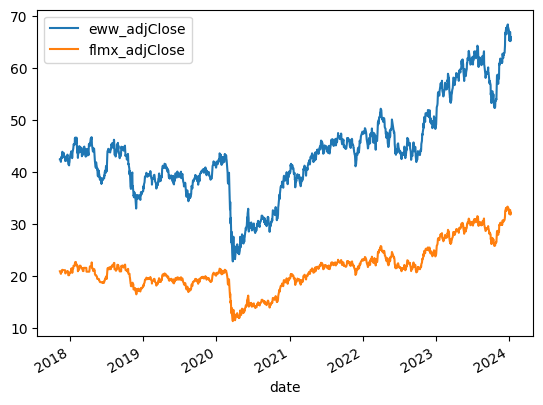

In [11]:
#Plot each price series 
eww_flmx_pair.plot(x='date', y=['eww_adjClose','flmx_adjClose'], kind='line')

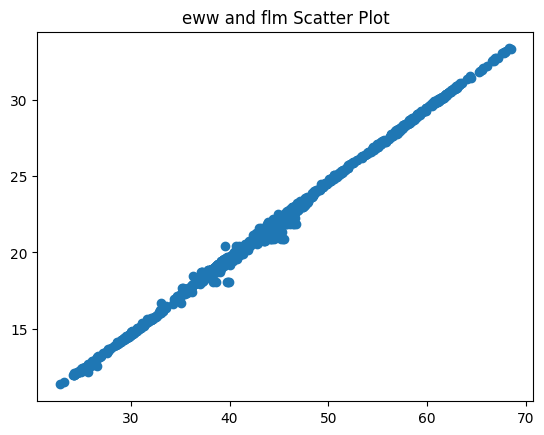

In [12]:
#Scatterplot 
def create_scatter_plot(df,x_col,y_col):
    x = df[x_col]
    y = df[y_col]
    plt.scatter(x, y)
    plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
    plt.title(f'{x_col[:3]} and {y_col[:3]} Scatter Plot')
    plt.show()

create_scatter_plot(eww_flmx_pair, 'eww_adjClose', 'flmx_adjClose')


In [13]:
#Run CADF test 
cointegration = coint(eww_flmx_pair['eww_adjClose'], eww_flmx_pair['flmx_adjClose'])
print(cointegration)

(-4.618953105540394, 0.0007755864661353836, array([-3.9035197 , -3.34007484, -3.04718739]))


In [14]:
#Run Basic Regression Results 
def make_ols(df, str1, str2):
    
    x = list(df[str2]) #independent variable
    y = list(df[str1]) #dependent variable
    

    x = sm.add_constant(x)
    
    # performing the regression
    # and fitting the model
    result = sm.OLS(y, x).fit()
    
    # printing the summary table
    print(result.summary())
    print("dependent:", str1)
    print("independent:",result.model.exog_names)
    print("coefficients:\n", result.params[1])
    return result.params[1]

flmx_independent_var = make_ols(eww_flmx_pair, 'eww_adjClose', 'flmx_adjClose')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 8.087e+05
Date:                Mon, 22 Jan 2024   Prob (F-statistic):               0.00
Time:                        22:19:29   Log-Likelihood:                -717.96
No. Observations:                1551   AIC:                             1440.
Df Residuals:                    1549   BIC:                             1451.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1202      0.050      2.419      0.0

In [15]:
def make_hedge_ratio(df, y_col, x_col, lookback):
    df['hedge_ratio'] = np.nan
    
    for i in range(lookback, len(df)):
        y_window = df[y_col].iloc[i-lookback:i]
        x_window = df[x_col].iloc[i-lookback:i]
        beta = sm.OLS(y_window, sm.add_constant(x_window)).fit().params[1]
        df.at[df.index[i], 'hedge_ratio'] = beta
    return df 

eww_flmx_pair = make_hedge_ratio(eww_flmx_pair, 'eww_adjClose', 'flmx_adjClose', 20)
eww_flmx_pair.head(30)

,date,eww_adjClose,eww_adjHigh,eww_adjLow,eww_adjOpen,eww_adjVolume,flmx_adjClose,flmx_adjHigh,flmx_adjLow,flmx_adjOpen,flmx_adjVolume,hedge_ratio
0,2017-11-10 00:00:00+00:00,42.506423,43.395000,42.493607,43.249752,4266917,20.939708,20.952244,20.939708,20.952244,200,NaN
1,2017-11-13 00:00:00+00:00,42.497879,42.587591,42.100583,42.318455,4034233,20.693162,20.693162,20.687312,20.693162,2000,NaN
2,2017-11-14 00:00:00+00:00,42.207383,42.604679,42.087767,42.506423,3364010,20.584515,20.668090,20.567800,20.617945,54163,NaN
3,2017-11-15 00:00:00+00:00,42.002327,42.207383,41.019766,42.062135,4174441,20.434080,20.509297,20.409007,20.509297,800,NaN
4,2017-11-16 00:00:00+00:00,42.532055,42.685847,42.113399,42.250103,2923000,20.701520,20.701520,20.567800,20.659732,700,NaN
5,2017-11-17 00:00:00+00:00,42.942167,43.194216,42.514967,42.677303,4389500,20.868670,20.868670,20.726592,20.743307,1586,NaN
6,2017-11-20 00:00:00+00:00,42.720023,42.959255,42.540599,42.668759,1818300,20.810167,20.843597,20.751665,20.826882,1366,NaN
7,2017-11-21 00:00:00+00:00,43.600056,43.758120,43.104504,43.138680,3532246,21.202969,21.244757,21.010747,21.027462,5540,NaN
8,2017-11-22 00:00:00+00:00,43.941816,44.069976,43.565880,43.830744,2840992,21.202969,21.202969,21.202969,21.202969,0,NaN
9,2017-11-24 00:00:00+00:00,43.796568,44.326296,43.762477,44.181048,1023835,21.202969,21.202969,21.202969,21.202969,0,NaN


In [16]:
def make_portfolio(df,cols, lookback):
    y_port = np.ones(df[cols].shape)
    y_port[:,0] = -df['hedge_ratio']
    y_port= y_port * df[cols]
    y_port = y_port[cols[0]] + y_port[cols[1]]
    
    moving_avg = y_port.rolling(window=lookback).mean()
    moving_std = y_port.rolling(window=lookback).std()
    Zscore = (y_port - moving_avg) / moving_std
    
    entry_Zscore = 1.0
    exit_Zscore = 0.0
    
    long_entry = Zscore < -entry_Zscore
    short_entry = Zscore > exit_Zscore 
    
    num_units_long = np.empty((len(y_port), 1))
    num_units_long = pd.DataFrame(np.where(long_entry, 1, 0))
    num_units_short = np.empty((len(y_port), 1))
    num_units_short = pd.DataFrame(np.where(short_entry, -1, 0))
    num_units = num_units_long + num_units_short
    
    temp1 = pd.DataFrame(np.matlib.repmat(num_units, 1, 2))
    temp2 = np.ones(df[cols].shape)
    temp2[:, 0] = -df['hedge_ratio']

    position = np.multiply(np.multiply(temp1, temp2), df[cols])
    position['num_units_long'] = num_units_long
    position['num_units_short'] = num_units_short
    position['num_units'] = num_units
    df1 = pd.concat([df,position], axis = 1)
    df1 = df1.rename(columns={0: 'eww_dollar_position', 1:'flmx_dollar_position'})
    return df1
    
eww_flmx_pair = make_portfolio(eww_flmx_pair, ['eww_adjClose', 'flmx_adjClose'], 20)
eww_flmx_pair.tail(20)

C:\Users\PC\AppData\Local\Temp\ipykernel_11476\3191082017.py:27: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  position = np.multiply(np.multiply(temp1, temp2), df[cols])


,date,eww_adjClose,eww_adjHigh,eww_adjLow,eww_adjOpen,eww_adjVolume,flmx_adjClose,flmx_adjHigh,flmx_adjLow,flmx_adjOpen,flmx_adjVolume,hedge_ratio,eww_dollar_position,flmx_dollar_position,num_units_long,num_units_short,num_units
1531,2023-12-13 00:00:00+00:00,64.386345,64.593154,62.840206,63.470480,3001430,31.467716,31.591536,30.680524,30.954807,6840,2.103395,-135.429938,31.467716,1,0,1
1532,2023-12-14 00:00:00+00:00,66.789262,66.799110,64.021969,64.307561,4629427,32.574743,32.575232,31.464190,31.464190,7005,2.136751,-142.712047,32.574743,1,0,1
1533,2023-12-15 00:00:00+00:00,66.680934,67.222575,66.267317,66.749870,4182263,32.637000,32.830100,32.505000,32.670000,7521,2.150871,-143.422113,32.637000,1,0,1
1534,2023-12-18 00:00:00+00:00,67.577103,67.803608,66.011268,67.074854,3491662,33.070000,33.070000,32.390100,32.600000,15467,2.108827,-142.508446,33.070000,1,0,1
1535,2023-12-19 00:00:00+00:00,67.774064,68.660385,67.527863,67.902088,3018654,33.100000,33.525000,33.060100,33.170000,7342,2.088333,-141.534838,33.100000,1,0,1
1536,2023-12-20 00:00:00+00:00,66.560000,68.040000,66.500000,67.770000,2585552,32.561000,33.240000,32.561000,33.090000,9701,2.093514,-139.344275,32.561000,1,0,1
1537,2023-12-21 00:00:00+00:00,67.850000,67.950000,66.930000,66.930000,2418473,33.159200,33.160000,32.919400,32.950000,16880,2.087128,-141.611611,33.159200,1,0,1
1538,2023-12-22 00:00:00+00:00,67.810000,68.420000,67.600000,68.340000,1402540,33.132300,33.400000,33.132300,33.280000,6645,2.082826,-141.236457,33.132300,1,0,1
1539,2023-12-26 00:00:00+00:00,68.310000,68.700000,68.020000,68.300000,1151944,33.379000,33.480000,33.340000,33.410000,3168,2.077580,-141.919468,33.379000,1,0,1
1540,2023-12-27 00:00:00+00:00,68.460000,68.785000,68.140000,68.680000,2047166,33.330000,33.590000,33.330000,33.380000,31779,2.075641,-0.000000,0.000000,0,0,0


In [17]:
def get_pnl(df, dollar_cols, price_cols):
    position = df[dollar_cols]
    pnl = np.sum(np.multiply(position[:-1], np.divide(np.diff(df[price_cols], axis=0), df[price_cols][:-1])), axis=1)
    df['pnl'] = pnl
    mkt_value = pd.DataFrame.sum(abs(position[:-1]), axis=1)
        
    # return is pnl divided by gross market value
    ret = pnl / mkt_value
    ret = ret.fillna(method='pad')
    df['market_value'] = mkt_value
    df['pnl'] = pnl
    df['returns'] = ret
    
    
    # compute Sharpe
    sharpe_ratio = (np.sqrt(252) * np.mean(ret)) / np.std(ret) 
    APR = np.prod(1+ret) ** (252.0 / len(ret)) - 1
    print(f'Price spread Sharpe: {sharpe_ratio}')
    print(f'Price spread APR: {APR * 100}%')
    return df

get_pnl(eww_flmx_pair, ['eww_dollar_position', 'flmx_dollar_position'], ['eww_adjClose', 'flmx_adjClose'])

Price spread Sharpe: 2.6161558466971164
Price spread APR: 54.04294228030573%


C:\Users\PC\AppData\Local\Temp\ipykernel_11476\2434491618.py:3: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  pnl = np.sum(np.multiply(position[:-1], np.divide(np.diff(df[price_cols], axis=0), df[price_cols][:-1])), axis=1)


,date,eww_adjClose,eww_adjHigh,eww_adjLow,eww_adjOpen,eww_adjVolume,flmx_adjClose,flmx_adjHigh,flmx_adjLow,flmx_adjOpen,flmx_adjVolume,hedge_ratio,eww_dollar_position,flmx_dollar_position,num_units_long,num_units_short,num_units,pnl,market_value,returns
0,2017-11-10 00:00:00+00:00,42.506423,43.395000,42.493607,43.249752,4266917,20.939708,20.952244,20.939708,20.952244,200,NaN,NaN,0.0000,0,0,0,0.000000,0.000000,NaN
1,2017-11-13 00:00:00+00:00,42.497879,42.587591,42.100583,42.318455,4034233,20.693162,20.693162,20.687312,20.693162,2000,NaN,NaN,0.0000,0,0,0,0.000000,0.000000,NaN
2,2017-11-14 00:00:00+00:00,42.207383,42.604679,42.087767,42.506423,3364010,20.584515,20.668090,20.567800,20.617945,54163,NaN,NaN,0.0000,0,0,0,0.000000,0.000000,NaN
3,2017-11-15 00:00:00+00:00,42.002327,42.207383,41.019766,42.062135,4174441,20.434080,20.509297,20.409007,20.509297,800,NaN,NaN,0.0000,0,0,0,0.000000,0.000000,NaN
4,2017-11-16 00:00:00+00:00,42.532055,42.685847,42.113399,42.250103,2923000,20.701520,20.701520,20.567800,20.659732,700,NaN,NaN,0.0000,0,0,0,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1546,2024-01-05 00:00:00+00:00,66.880000,67.010000,65.651200,65.730000,2779806,32.750000,32.750000,32.110000,32.110000,15294,2.099119,-0.000000,0.0000,0,0,0,0.000000,0.000000,0.014288
1547,2024-01-08 00:00:00+00:00,66.990000,67.280000,66.700000,66.870000,2632868,32.725000,32.802500,32.610000,32.610000,6836,2.094247,-0.000000,0.0000,0,0,0,0.000000,0.000000,0.014288
1548,2024-01-09 00:00:00+00:00,65.240000,66.530000,65.210000,66.450000,2704329,31.840000,32.520000,31.840000,32.520000,15215,2.082083,135.835104,-31.8400,0,-1,-1,0.484704,167.675104,0.002891
1549,2024-01-10 00:00:00+00:00,65.530000,65.680000,65.080000,65.290000,1667833,31.959100,32.020000,31.829000,31.850000,11235,2.085212,136.643970,-31.9591,0,-1,-1,0.786806,168.603070,0.004667


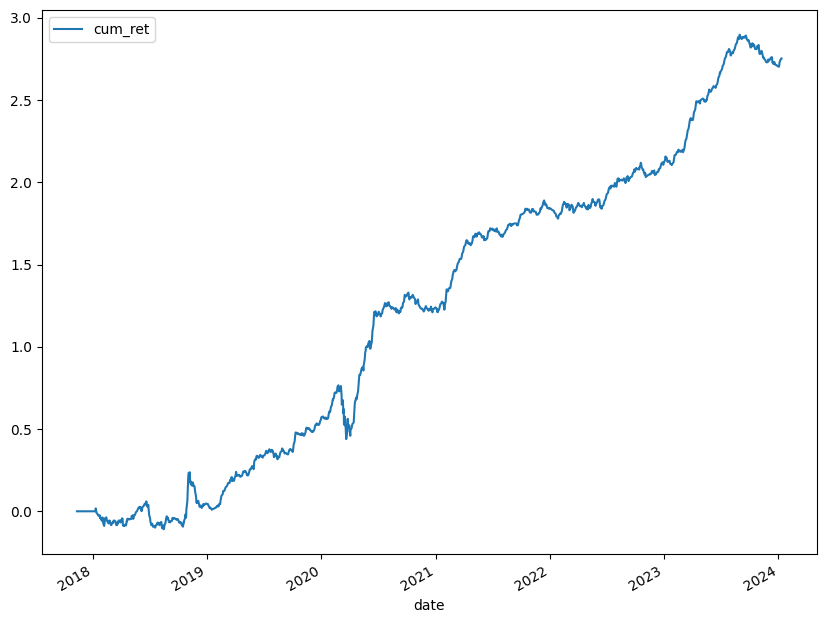

In [18]:
def plot_cum_ret(df):
    df['cum_ret'] = df['returns'].cumsum()
    df['cum_ret'] = df['cum_ret'].fillna(method='pad')
    df['cum_ret'] = df['cum_ret'].fillna(0)
    df.plot(x='date', y=['cum_ret'], kind='line')

plot_cum_ret(eww_flmx_pair)